In [52]:
from matplotlib import pyplot as plt 
import numpy as np
import warnings
import imageio
cats = imageio.imread('kqed_selfie_320_g.png')  # read a standard image

In [53]:
def find_mins(func):
    crit = func.deriv().r
    r_crit = crit[crit.imag==0].real
    test = func.deriv(2)(r_crit) 

    x_min = r_crit[test>0]
    y_min = func(x_min)
    mins = {'x': x_min, 'y':y_min}
    
    return mins

In [54]:
valrange = 255
xvals = [ x for x in range(valrange) ]
degs = 30
flatcats = cats.flatten()
# should probably normalize here?
# normcats = np.linalg.norm(flatcats)
# turns out that is the wrong way to do it
normcats = flatcats

# type(cats)
# cats.shape


In [55]:
hist,bins = np.histogram(normcats, bins=valrange) 
# print(bins) 
# print(hist)

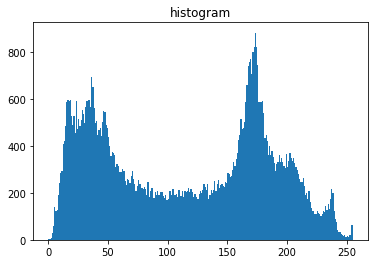

In [56]:
plt.hist(normcats, bins=valrange) 
plt.title("histogram") 
plt.show()

In [57]:
x = np.array(xvals)
y = np.array(hist)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    pdegs = np.poly1d(np.polyfit(x, y, degs))


In [58]:
minima = find_mins(pdegs)
ymax = hist.max()
ymax

883

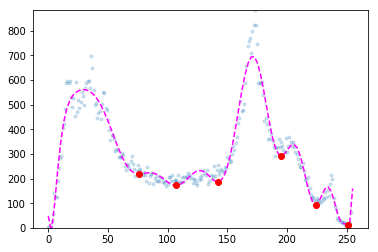

In [59]:
xp = np.linspace(0, valrange, 100)
_ = plt.plot(x, y, '.', alpha=0.2)
_ = plt.plot(xp, pdegs(xp), '--', color='#ff00ff')
_ = plt.plot(minima['x'], minima['y'], 'o', color="#ff0000" )
plt.ylim(0,ymax)

plt.show()

In [60]:
minima['x']

array([251.47659477, 223.87258538, 195.07039492, 142.01262757,
       106.93598472,  76.091685  ,   1.83819336])

In [61]:
xp

array([  0.        ,   2.57575758,   5.15151515,   7.72727273,
        10.3030303 ,  12.87878788,  15.45454545,  18.03030303,
        20.60606061,  23.18181818,  25.75757576,  28.33333333,
        30.90909091,  33.48484848,  36.06060606,  38.63636364,
        41.21212121,  43.78787879,  46.36363636,  48.93939394,
        51.51515152,  54.09090909,  56.66666667,  59.24242424,
        61.81818182,  64.39393939,  66.96969697,  69.54545455,
        72.12121212,  74.6969697 ,  77.27272727,  79.84848485,
        82.42424242,  85.        ,  87.57575758,  90.15151515,
        92.72727273,  95.3030303 ,  97.87878788, 100.45454545,
       103.03030303, 105.60606061, 108.18181818, 110.75757576,
       113.33333333, 115.90909091, 118.48484848, 121.06060606,
       123.63636364, 126.21212121, 128.78787879, 131.36363636,
       133.93939394, 136.51515152, 139.09090909, 141.66666667,
       144.24242424, 146.81818182, 149.39393939, 151.96969697,
       154.54545455, 157.12121212, 159.6969697 , 162.27

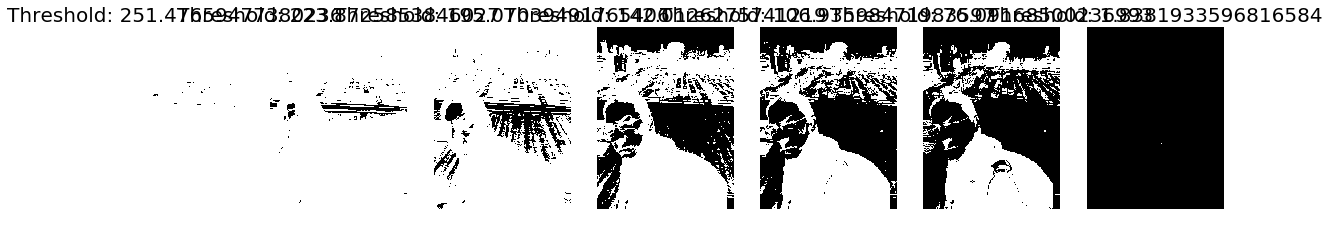

In [69]:
def simple_threshold(im, threshold=128):
    return ((im > threshold) * 255).astype("uint8")

thresholds = minima['x']

fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
                        
for t, ax in zip(thresholds, axs):
    filename = "{}.png".format(t)
    timg = simple_threshold(cats, t)
    imageio.imwrite(filename, timg)
    ax.imshow(timg, cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();

In [51]:
minima

{'x': array([-236.14022425,  251.01606457,  239.69980011,  220.73617498,
         194.80194002,  163.76546842,  129.35972885,   92.23426289,
          59.02056079,   30.18113911,   10.24651773]),
 'y': array([-4.16844899e+14, -6.34695669e+03, -1.82664677e+03, -8.50836969e+02,
        -4.39979125e+02, -3.05724229e+02,  2.08415156e+01,  1.47545349e+02,
         3.91311528e+02,  1.55031188e+03,  4.04073252e+03])}